<a href="https://colab.research.google.com/github/sanndy11/Tareas_diplomado_modulo2/blob/main/Clase7_Sep_Hern%C3%A1ndezSandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hernández Nájera Sandra Xochiquetzalli**

Vamos modelar a traves de un experimento aleatorio, la ley (función de densidad de una v.a uniforme discreta)

### Diccionarios

Un diccionario es un objeto que se crea a partir de algo que se llama "llave" y nos arroja "valores":

\{ key : values \}

In [ ]:
d = {"Claudia": ["Masha","Snow"],
        "Nivel": [7,10],
        "Calif": [6.2,8.3]
        }
d

{'Claudia': ['Masha', 'Snow'], 'Nivel': [7, 10], 'Calif': [6.2, 8.3]}

In [ ]:
type(d) #Tipo

dict

In [ ]:
d.keys() #Son las llaves de un diccionario

dict_keys(['Claudia', 'Nivel', 'Calif'])

In [ ]:
d.values()

dict_values([['Masha', 'Snow'], [7, 10], [6.2, 8.3]])

In [ ]:
d.values()[0]

TypeError: 'dict_values' object is not subscriptable

In [ ]:
d.items()

dict_items([('Claudia', ['Masha', 'Snow']), ('Nivel', [7, 10]), ('Calif', [6.2, 8.3])])

## Ejemplo de la v.a. uniforme

Sea el experimento aleatorio de lanzar dos dados justos:
* $\Omega = \{1,2,3,4,5,6\}\times \{1,2,3,4,5,6\} $
* $\mathcal{F} = P(\Omega)$
* Para $w=(i,j)$ donde $i,j\in\{1,...,6\}$ talque
   $$\mathbb{P}( \{ \omega \} )=\frac{1}{36}$$

Vamos a definir a la siguiente variable aleatoria:
     $$S:\Omega \to R_{S}$$

donde $R_{S}=\{2,3,4,5,6,7,8,9,10,11,12\}$    

Para que entendamos la ley de una v.a., basta con entender los siguientes datos

$$\{(k,\mathbb{P}(S=k))\}_{k\in R_{S}}$$

Vamos a entender a $S$ como eventos.

Sea $S_{n}$ el evento la suma de las caras es $n$.

$$S_{n} = \{(i,j)\in\Omega \mid i+j =n \} $$

In [ ]:
from itertools import product #para el prodcuto cartesiano
from fractions import Fraction

Primero vamos a crear una función de probabilidad global:

In [ ]:
def P(A, Omega):
  P = Fraction(len(A),len(Omega))
  return P

In [ ]:
S_2 = {(i,j) for i in range(1,7) for j in range(1,7) if i+j == 2 }
S_2

{(1, 1)}

Nota. Realizar esto para cada valor de $n$ quita tiempo. Vamos a hacer esto más rápido utilizando diccionarios.

In [ ]:
#Primero vamos a crear a nuestro espacio muestral Omega
L = [i for i in range(1,7)] #Lista por comprensión
#print(L)
Omega = set(product(L, repeat=2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [ ]:
S = {(i,j): i+j for i,j in Omega}
S

{(3, 4): 7,
 (4, 3): 7,
 (3, 1): 4,
 (5, 4): 9,
 (4, 6): 10,
 (5, 1): 6,
 (2, 2): 4,
 (1, 6): 7,
 (2, 5): 7,
 (1, 3): 4,
 (6, 2): 8,
 (6, 5): 11,
 (4, 2): 6,
 (4, 5): 9,
 (3, 3): 6,
 (5, 6): 11,
 (3, 6): 9,
 (5, 3): 8,
 (2, 4): 6,
 (1, 2): 3,
 (2, 1): 3,
 (1, 5): 6,
 (6, 1): 7,
 (6, 4): 10,
 (3, 2): 5,
 (4, 1): 5,
 (3, 5): 8,
 (5, 2): 7,
 (4, 4): 8,
 (5, 5): 10,
 (1, 1): 2,
 (1, 4): 5,
 (2, 3): 5,
 (2, 6): 8,
 (6, 6): 12,
 (6, 3): 9}

In [ ]:
#Vamos a crear un diccionario por default de manera sintetica y arreglada
from collections import defaultdict
dS = defaultdict(set) #lista
dS

defaultdict(set, {})

[Para collections ir a](https://docs.python.org/es/3/library/collections.html)

Vamos a añadir elementos a un diccionario que esta vacio

In [ ]:
#for i,j in S.items():
  #print(j)
  #Si imprimo j, me da los valores del diccionario
  #Si imprimo i, me da los elementos de la izquiera (llaves)

In [ ]:
for i,j in S.items():
  dS[j].add(i) #añadiendo al diccionario las llaves
dS

defaultdict(set,
            {7: {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)},
             4: {(1, 3), (2, 2), (3, 1)},
             9: {(3, 6), (4, 5), (5, 4), (6, 3)},
             10: {(4, 6), (5, 5), (6, 4)},
             6: {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)},
             8: {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)},
             11: {(5, 6), (6, 5)},
             3: {(1, 2), (2, 1)},
             5: {(1, 4), (2, 3), (3, 2), (4, 1)},
             2: {(1, 1)},
             12: {(6, 6)}})

In [ ]:
leyS = {k : P(A,Omega) for k,A in dS.items() }
leyS

{7: Fraction(1, 6),
 4: Fraction(1, 12),
 9: Fraction(1, 9),
 10: Fraction(1, 12),
 6: Fraction(5, 36),
 8: Fraction(5, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 5: Fraction(1, 9),
 2: Fraction(1, 36),
 12: Fraction(1, 36)}

# Introducción a Pandas en Python

**Pandas** es una biblioteca de Python muy popular para la manipulación y análisis de datos. Proporciona estructuras de datos de alto rendimiento como `Series` y `DataFrame` que hacen que trabajar con datos tabulares y series temporales sea fácil.

1.  Importar Pandas
Para empezar a trabajar con Pandas, lo primero es importarlo:

In [ ]:
import pandas as pd

## Series en Pandas

Una Series es una estructura de datos unidimensional (similar a una lista o un array de NumPy), pero con etiquetas. Aquí tienes un ejemplo:


In [ ]:
# Crear una Serie
serie = pd.Series([1, 3, 5, 7, 9], index=['a', 'b', 'c', 'd', 'e'])
print(serie)

a    1
b    3
c    5
d    7
e    9
dtype: int64


In [ ]:
#Acceder a un elemento de la Serie
print(serie['c'])

5


Regresando a nuestro ejermplo de la suma de las caras del dado, tenemos

In [ ]:
leyS = pd.Series(leyS)
leyS = leyS.sort_index()

In [ ]:
leyS

,0
2,1/36
3,1/18
4,1/12
5,1/9
6,5/36
7,1/6
8,5/36
9,1/9
10,1/12
11,1/18


## Ejercicios

1.   Documenta tu colab
2.   Calcular la ley de las siguientes variables aleatorias
     *   La diferencia de las caras es mayor que 1
     *   La suma de las caras sea par
3. Verifica en cada caso, que
   $$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$
4. Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)   
5. Sube tu notebook a GitHub


#**La diferencia de las caras es mayor a 1**

In [ ]:
#La diferencia de las caras es mayor a 1
dif_mayor_1 = {(i,j) for i in range (1,7) for j in range (1,7) if abs(i-j)>1}
dif_mayor_1

{(1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4)}

In [ ]:
#Primero vamos a crear a nuestro espacio muestral Omega
L = [i for i in range(1,7)] #Lista por comprensión
#print(L)
Omega = set(product(L, repeat=2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [ ]:
S = {(i,j): abs(i-j) for i,j in Omega}
S

{(3, 4): 1,
 (4, 3): 1,
 (3, 1): 2,
 (5, 4): 1,
 (4, 6): 2,
 (5, 1): 4,
 (2, 2): 0,
 (1, 6): 5,
 (2, 5): 3,
 (1, 3): 2,
 (6, 2): 4,
 (6, 5): 1,
 (4, 2): 2,
 (4, 5): 1,
 (3, 3): 0,
 (5, 6): 1,
 (3, 6): 3,
 (5, 3): 2,
 (2, 4): 2,
 (1, 2): 1,
 (2, 1): 1,
 (1, 5): 4,
 (6, 1): 5,
 (6, 4): 2,
 (3, 2): 1,
 (4, 1): 3,
 (3, 5): 2,
 (5, 2): 3,
 (4, 4): 0,
 (5, 5): 0,
 (1, 1): 0,
 (1, 4): 3,
 (2, 3): 1,
 (2, 6): 4,
 (6, 6): 0,
 (6, 3): 3}

In [ ]:
from collections import defaultdict
dS = defaultdict(set) #lista
dS

defaultdict(set, {})

In [ ]:
for i,j in S.items():
  dS[j].add(i) #añadiendo al diccionario las llaves
dS

defaultdict(set,
            {1: {(1, 2),
              (2, 1),
              (2, 3),
              (3, 2),
              (3, 4),
              (4, 3),
              (4, 5),
              (5, 4),
              (5, 6),
              (6, 5)},
             2: {(1, 3),
              (2, 4),
              (3, 1),
              (3, 5),
              (4, 2),
              (4, 6),
              (5, 3),
              (6, 4)},
             4: {(1, 5), (2, 6), (5, 1), (6, 2)},
             0: {(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)},
             5: {(1, 6), (6, 1)},
             3: {(1, 4), (2, 5), (3, 6), (4, 1), (5, 2), (6, 3)}})

In [ ]:
leyS = {k : P(A,Omega) for k,A in dS.items() }
leyS

{1: Fraction(5, 18),
 2: Fraction(2, 9),
 4: Fraction(1, 9),
 0: Fraction(1, 6),
 5: Fraction(1, 18),
 3: Fraction(1, 6)}

In [ ]:
sum(leyS.values()) #Suma de las probabilidades

Fraction(1, 1)

In [ ]:
sum([value for key, value in leyS.items() if key in (2, 3, 4, 5)]) #Probabilidad de que la diferencia sea mayor 1

Fraction(5, 9)

In [ ]:
leyS = pd.Series(leyS)
leyS = leyS.sort_index()
leyS

,0
0,1/6
1,5/18
2,2/9
3,1/6
4,1/9
5,1/18


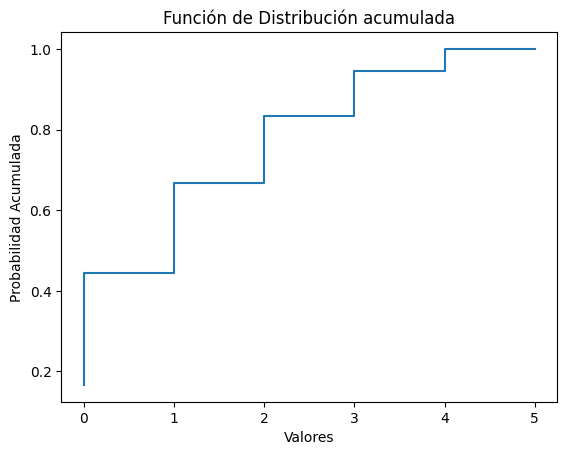

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cdf = leyS.cumsum()

plt.step(cdf.index, cdf.values)
plt.xlabel('Valores')
plt.ylabel('Probabilidad Acumulada')
plt.title('Función de Distribución Acumulada')
plt.show()

#**La suma de las caras sea par**

In [ ]:
dif_par = {(i,j) for i in range (1,7) for j in range (1,7) if (i+j)%2 == 0}
dif_par

{(1, 1),
 (1, 3),
 (1, 5),
 (2, 2),
 (2, 4),
 (2, 6),
 (3, 1),
 (3, 3),
 (3, 5),
 (4, 2),
 (4, 4),
 (4, 6),
 (5, 1),
 (5, 3),
 (5, 5),
 (6, 2),
 (6, 4),
 (6, 6)}

In [ ]:
#Primero vamos a crear a nuestro espacio muestral Omega
L = [i for i in range(1,7)] #Lista por comprensión
#print(L)
Omega = set(product(L, repeat=2))
Omega

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [ ]:
S = {(i,j): (i+j)%2 for i,j in Omega}
S

{(3, 4): 1,
 (4, 3): 1,
 (3, 1): 0,
 (5, 4): 1,
 (4, 6): 0,
 (5, 1): 0,
 (2, 2): 0,
 (1, 6): 1,
 (2, 5): 1,
 (1, 3): 0,
 (6, 2): 0,
 (6, 5): 1,
 (4, 2): 0,
 (4, 5): 1,
 (3, 3): 0,
 (5, 6): 1,
 (3, 6): 1,
 (5, 3): 0,
 (2, 4): 0,
 (1, 2): 1,
 (2, 1): 1,
 (1, 5): 0,
 (6, 1): 1,
 (6, 4): 0,
 (3, 2): 1,
 (4, 1): 1,
 (3, 5): 0,
 (5, 2): 1,
 (4, 4): 0,
 (5, 5): 0,
 (1, 1): 0,
 (1, 4): 1,
 (2, 3): 1,
 (2, 6): 0,
 (6, 6): 0,
 (6, 3): 1}

In [ ]:
from collections import defaultdict
dS = defaultdict(set) #lista
dS

defaultdict(set, {})

In [ ]:
for i,j in S.items():
  dS[j].add(i) #añadiendo al diccionario las llaves
dS

defaultdict(set,
            {1: {(1, 2),
              (1, 4),
              (1, 6),
              (2, 1),
              (2, 3),
              (2, 5),
              (3, 2),
              (3, 4),
              (3, 6),
              (4, 1),
              (4, 3),
              (4, 5),
              (5, 2),
              (5, 4),
              (5, 6),
              (6, 1),
              (6, 3),
              (6, 5)},
             0: {(1, 1),
              (1, 3),
              (1, 5),
              (2, 2),
              (2, 4),
              (2, 6),
              (3, 1),
              (3, 3),
              (3, 5),
              (4, 2),
              (4, 4),
              (4, 6),
              (5, 1),
              (5, 3),
              (5, 5),
              (6, 2),
              (6, 4),
              (6, 6)}})

In [ ]:
leyS = {k : P(A,Omega) for k,A in dS.items() }
leyS

{1: Fraction(1, 2), 0: Fraction(1, 2)}

In [ ]:
sum(leyS.values()) #Suma de las probabilidades

Fraction(1, 1)

In [ ]:
sum([value for key, value in leyS.items() if key == 0]) #Probabilidad de que sea par

Fraction(1, 2)

In [ ]:
leyS = pd.Series(leyS)
leyS = leyS.sort_index()
leyS

,0
0,1/2
1,1/2


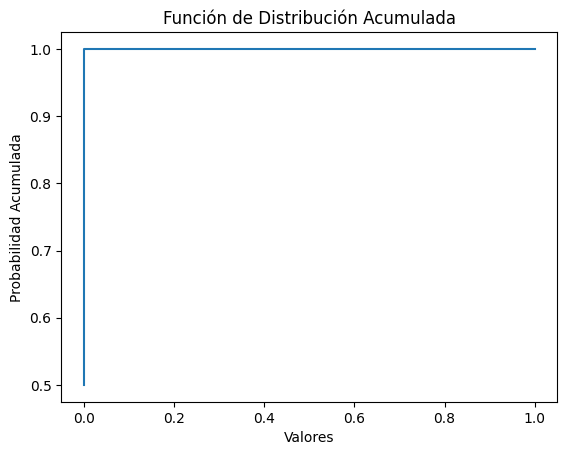

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cdf = leyS.cumsum()

plt.step(cdf.index, cdf.values)
plt.xlabel('Valores')
plt.ylabel('Probabilidad Acumulada')
plt.title('Función de Distribución Acumulada')
plt.show()